## 1. Умова задачі.

Провести аналіз датасету та зробити висновки: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 

## 2. Завантажуємо дані, перевіряємо та чистимо їх.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.shape

(48895, 16)

Отже, маємо таблицю з 48 895 рядками і 16 стовбцями.

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Деякі рядки не містять значень, тому виправляємо це.

In [7]:
df = df[pd.notnull(df['name'])]
df = df[pd.notnull(df['host_name'])]

In [8]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## 3. Візуалізуємо найцікавіші для нас дані.

### 3.1. Визначаємо найдорожчий для оренди район.

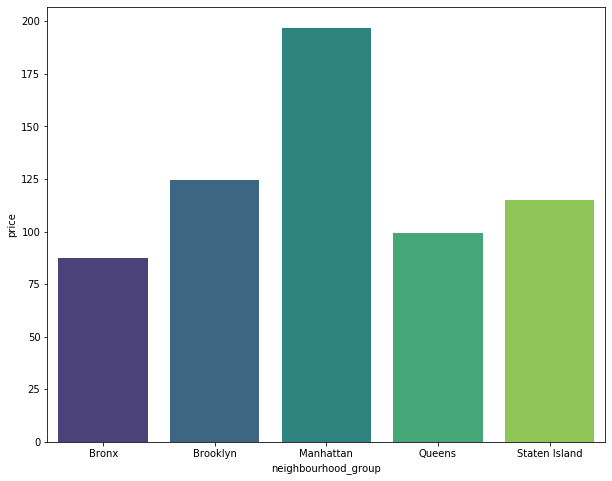

In [77]:
ngroup = df.groupby('neighbourhood_group', as_index=False)[['price']].mean()

plt.figure(figsize=(10,8))
sns.barplot(data=ngroup, x=ngroup['neighbourhood_group'], y=ngroup['price'], palette='viridis')
plt.show()

In [93]:
ngroup

,neighbourhood_group,price
0,Bronx,87.469238
1,Brooklyn,124.410523
2,Manhattan,196.897473
3,Queens,99.536017
4,Staten Island,114.812332


Згідно аналізу, найдорожчий район у Нью-Йорку — Мангеттен (197 доларів/доба).

### 3.2. Визначаємо найдорожчий вид помешкання для оренди.

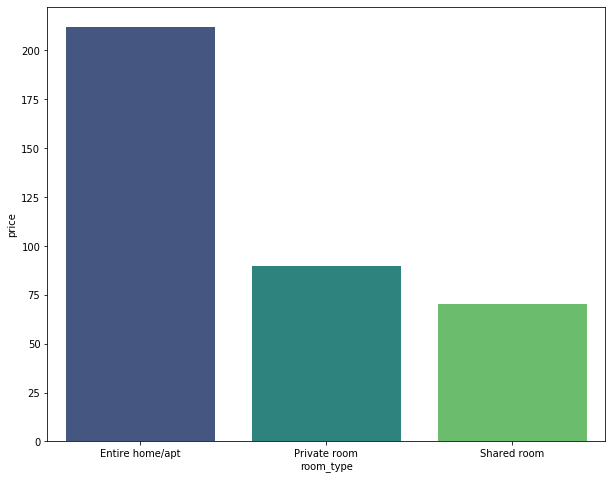

In [78]:
rtype = df.groupby('room_type', as_index=False)[['price']].mean()

plt.figure(figsize=(10,8))
sns.barplot(data=rtype, x=rtype['room_type'], y=rtype['price'], palette='viridis')
plt.show()

In [92]:
rtype

,room_type,price
0,Entire home/apt,211.806994
1,Private room,89.794360
2,Shared room,70.075928


Найдорожчий вид помешкання для оренди в Нью-Йорку — апартаменти (212 доларів/доба), далі — приватна кімната (90 доларів/доба). Спільна кімната коштує 70 доларів/доба.

### 3.3. Співставлямо обидва критерії — район та вид помешкання.

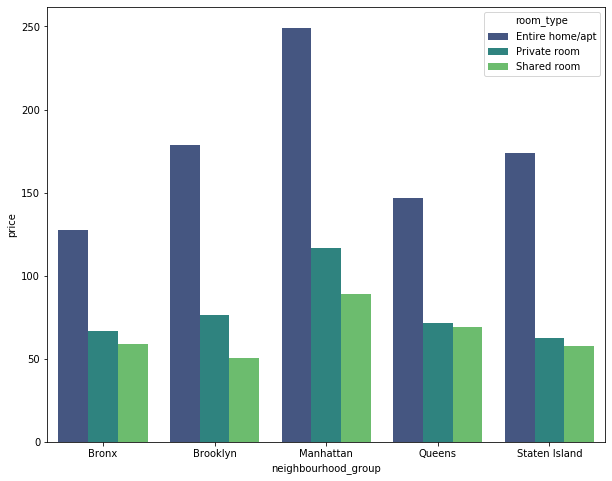

In [72]:
n_r_group = pd.DataFrame(df.groupby(['neighbourhood_group', 'room_type'],
                                                as_index=False)[['price']].mean())

plt.figure(figsize=(10,8))
sns.barplot(data=n_r_group, x=n_r_group['neighbourhood_group'], y=n_r_group['price'],
            hue=n_r_group['room_type'], palette='viridis')
plt.show()

In [94]:
n_r_group

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


Як бачимо, Мантхеттен найдорожчий з усіх районів, а апартаменти — найдорожчий вид житла скрізь (250 доларів/доба у Мангеттені).

### 3.4. Географічний розподіл орендованого помешкання.

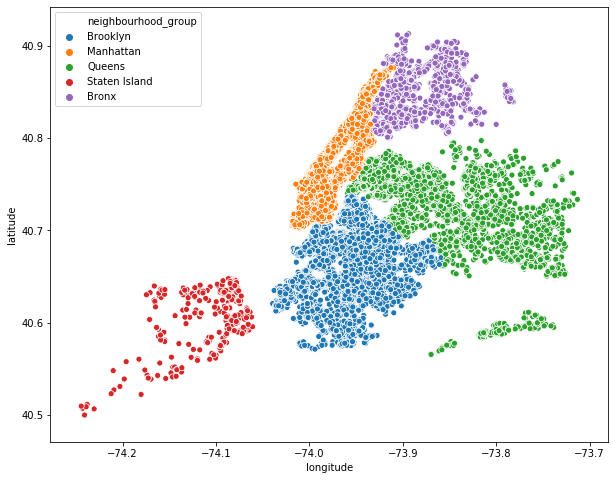

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['neighbourhood_group'])
plt.show()

Візуально важко визначити найактивніший район, тому поглянемо на цифри.

### 3.5. Визначаємо найактивніший за орендами район.

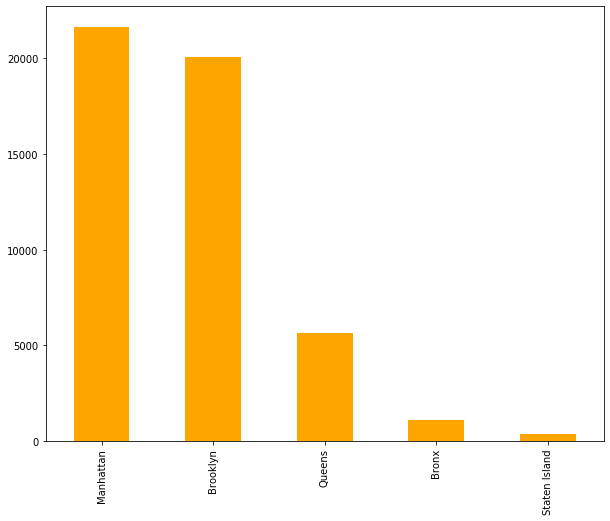

In [91]:
plt.figure(figsize=(10,8))
df['neighbourhood_group'].value_counts().plot(kind='bar',color='orange')
plt.show()

In [95]:
df['neighbourhood_group'].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

Найактивніший район — Мангеттен (21 643 оголошень), за яким іде Бруклін (20 089 оголошень).

### 3.6. Найбільший орендодавець за числом оголошень.

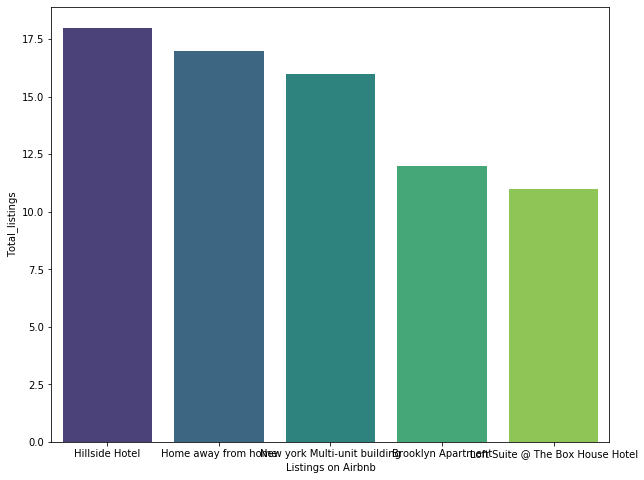

In [86]:
listings_count_df=df['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(data=listings_count_df, x=listings_count_df['Listings on Airbnb'], y=listings_count_df['Total_listings'], palette='viridis')
plt.show()

In [96]:
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11


Бачимо, що це — Hillside Hotel з 18 оголошеннями.

### 3.7. Визначаємо найчастіше ім'я для орендодавця.

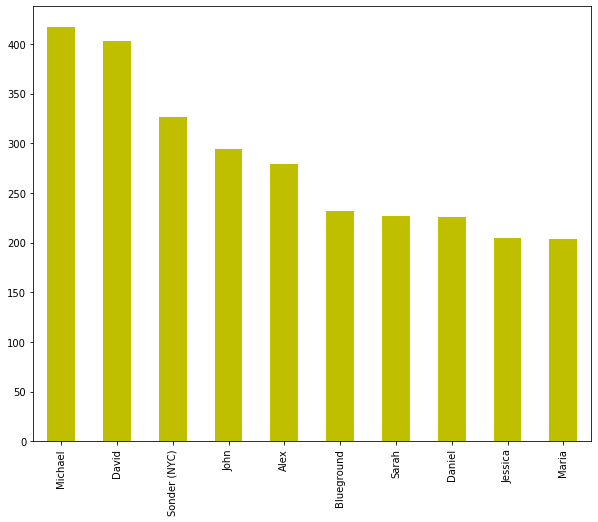

In [89]:
top_10_hosts=df['host_name'].value_counts()[:10]

plt.figure(figsize=(10,8))
top_10_hosts.plot(kind='bar', color='y')
plt.show()

In [97]:
top_10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Бачимо, що це — Michael з 417 оголошеннями.

## 4. Висновки



* найдорожчий район у Нью-Йорку — Мангеттен (197 доларів/доба у середньому).
* найдорожчий вид помешкання для оренди в Нью-Йорку — апартаменти (250 доларів/доба у Мангеттені).
* найактивніший район — Мангеттен, за яким іде Бруклін (21 643 оголошень проти 20 089).
* найбільший орендодавець за можливістю вибору — Hillside Hotel з 18 оголошеннями.
* найчастіше орендодавця звати Michael (417 випадків).